In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
train_df = pd.read_csv('Titanic-Dataset.csv')
test_df = pd.read_csv('Titanic-Dataset.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Preprocessing
# Handling missing values
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Fare'] = imputer.fit_transform(train_df[['Fare']])
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)  # Drop the Cabin column due to too many missing values


In [4]:
# Encoding categorical variables
labelencoder = LabelEncoder()
train_df['Sex'] = labelencoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = labelencoder.fit_transform(train_df['Embarked'])


In [6]:
# Feature scaling
scaler = StandardScaler()
features = ['Age', 'Fare']
train_df[features] = scaler.fit_transform(train_df[features])


In [7]:
# Drop unnecessary columns
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


In [8]:
# Split the data into features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']


In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict on the validation set
y_pred = model.predict(X_val)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



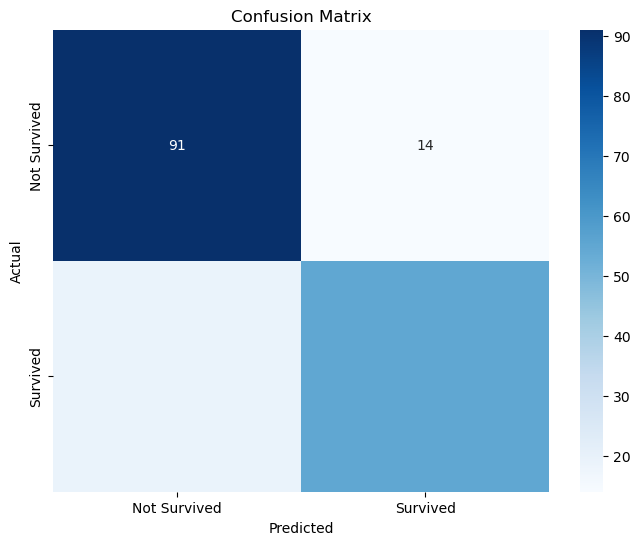

In [13]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


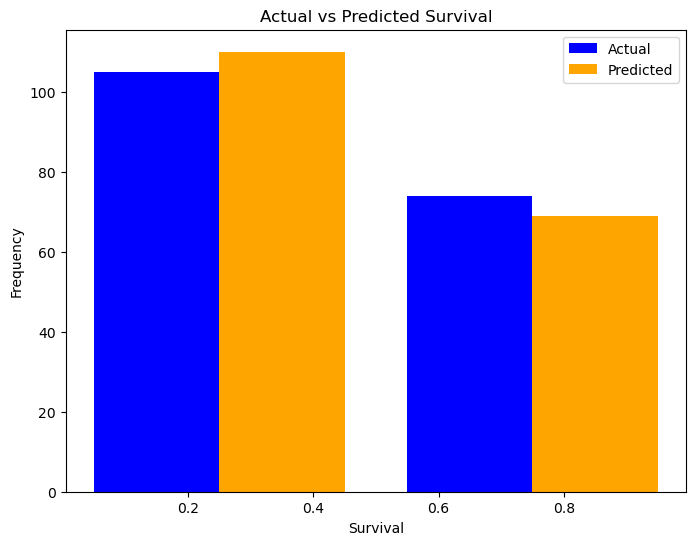

In [14]:
# Plotting the prediction results
plt.figure(figsize=(8, 6))
plt.hist([y_val, y_pred], bins=2, color=['blue', 'orange'], label=['Actual', 'Predicted'])
plt.xlabel('Survival')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Survival')
plt.legend()
plt.show()